# **Introduction to Image Processing**

** Dear students this is your first assignment in Image processing course, in the context of this assignment you have to:**
* **complete `2-enhancement.ipynb` up to section 2.7**
* **complete this notebook `2-enhancement-supplementary.ipynb`**
* **add your changes, commit and push your completed assignment to your github repo**

`2-enhancement-supplememtary.ipynb` provides more information on section 2.7

## 2.7 Your own implementation 

### Q.1 Import the required libraries and functions

In [2]:
% matplotlib inline
% pprint off


# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io
from skimage import img_as_float
from skimage import img_as_ubyte
from skimage.color import rgb2gray
### import the libraries you think its necessary for your task 

Pretty printing has been turned OFF


### Q.2 Contrast streching 

** Define your function which stretch the image contrast, `cont_str`, using minimum and maximum values from the image **

**This function should accept the input image, calculates the minimum and maximum and rescales the intensities.**

** Return the image as uint8 **

In [3]:
def cont_str (img): 
    a = 0
    b = 255
    c = np.amin(img)
    d = np.amax(img)
    for i in range(0, img.shape[0]-1):
        for j in range(0, img.shape[1]-1):
            img[i,j]=(img[i,j]-c)*(b-a)/(d-c)+a
    return img

**Use your function to transform the  gray version of `satellite.jpg` image (ubyte format), show the original image and the transformed image and their histogram**

2172504
144
227


C:\Users\home\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


724168
0
255


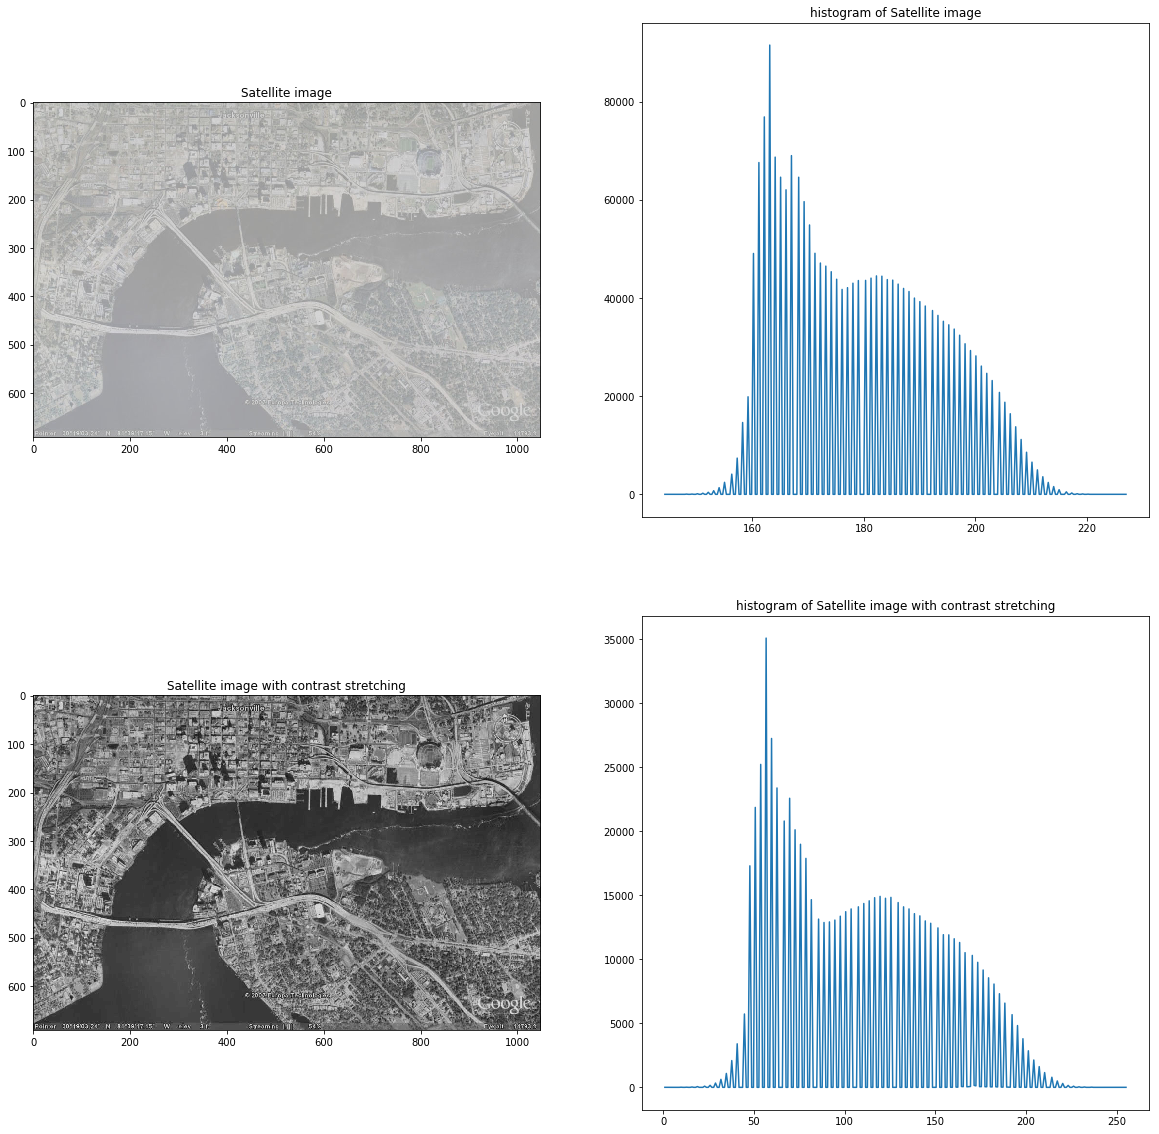

In [4]:
filename = './images/satellite.jpg'
satellite = io.imread(filename)


fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(satellite, cmap=cm.gray) #shows original image
ax0.set_title('Satellite image')
bins, bins_c=np.histogram(satellite, 256) #shows an instagram of an original image
ax1.plot(bins_c[1:],bins)
ax1.set_title('histogram of Satellite image')

print (satellite.size) #to compare with result after the implementation of a function
print(np.amin(satellite))
print(np.amax(satellite))

satellite_grey=rgb2gray(satellite) #convert color and type of an image to use function "cont_str"
satellite_grey=img_as_ubyte(satellite_grey)
satellite_str=cont_str(satellite_grey)

print (satellite_str.size)
print(np.amin(satellite_str)) #to check that function works correctly. We expect to get 0 and 255 since we stretched the range of intensities
print(np.amax(satellite_str))

ax2.imshow(satellite_str, cmap=cm.gray)
ax2.set_title('Satellite image with contrast stretching')
bins, bins_c=np.histogram(satellite_str, 256)
ax3.plot(bins_c[1:],bins)
ax3.set_title('histogram of Satellite image with contrast stretching')

### Q.3 Histogram equalization
Histogram equalization can be used to enhance the contrast in images.

The idea behind the histogram equalization process is that each gray level should have an equal contribution in the image. The function allowing such transformation is in fact the cumulative density function.

**Define your own histgram equalization function, `hist_eq`**

**This function should accpet the image, max_int and min_int and return the transformed image and its cdf**

In [31]:
def hist_eq(img, min_int, max_int): 
    
    num_of_bins = max_int - min_int
    imhist, bins = np.histogram(img.flatten(), bins=num_of_bins, normed=True) #calculate the histogram of original image
    hist_norm = imhist/(img.shape[0]*img.shape[1]) #normalize the histogram (ni)/n, n - sum of all pixels
    cdf = np.array(np.cumsum(hist_norm)) #cumulative distribution function
    f = np.uint8(255 * cdf/cdf[-1]) #transfer function
    img2 = np.interp(img.flatten(),bins[:-1],f) #linear interpolation

    return img2.reshape(img.shape), f
    
    
    
    

** Use your function to transform the gray version of `satellite.jpg` image again in ubyte format**

** max_int = 255, min_int = 0 **

C:\Users\home\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


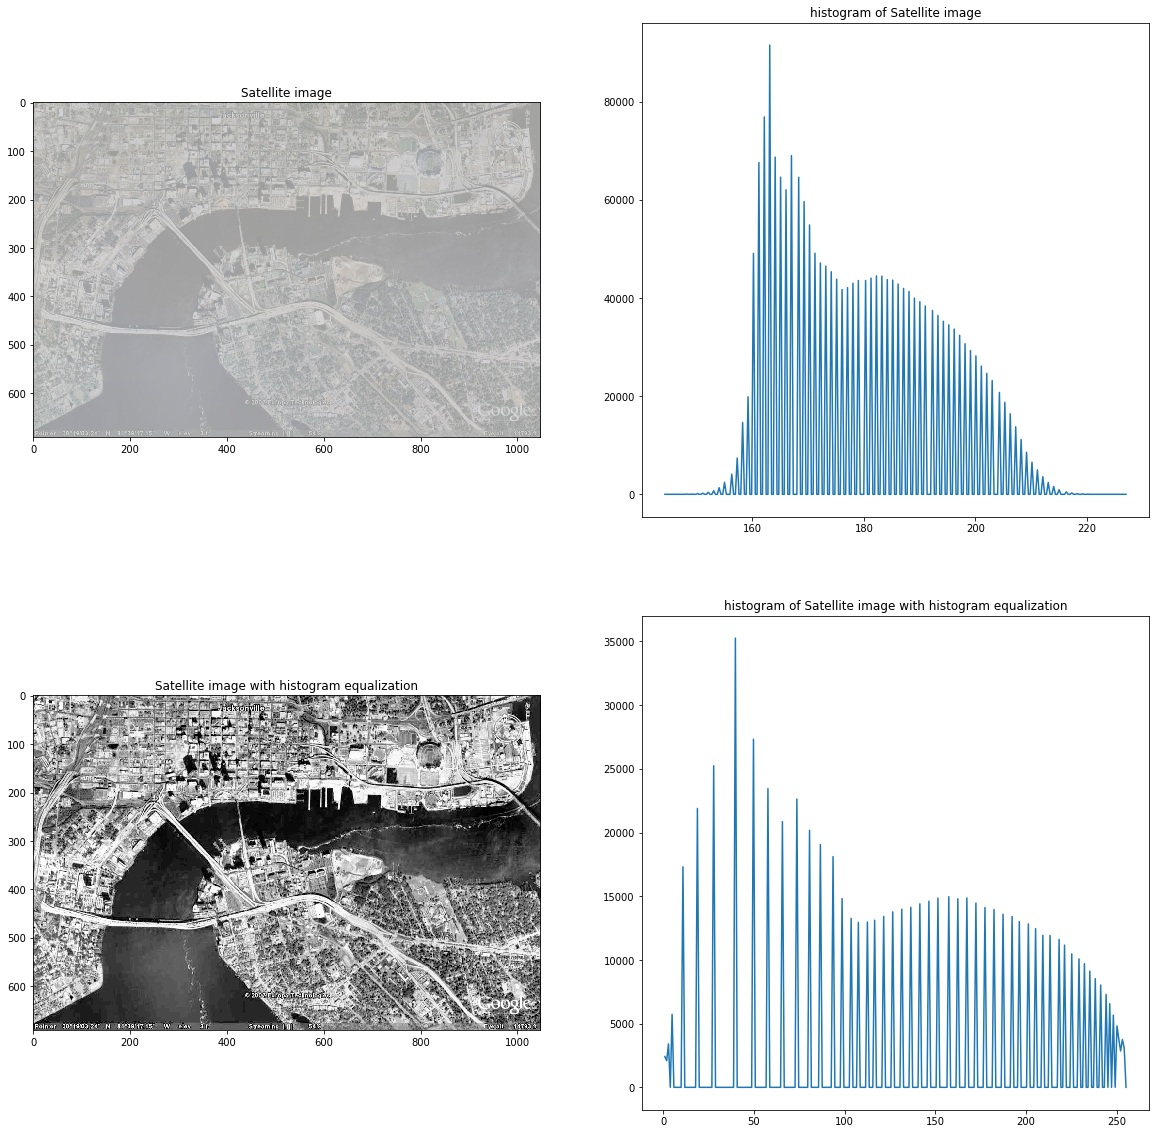

In [33]:
filename = './images/satellite.jpg'
satellite = io.imread(filename)


fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(20,20))
ax0, ax1, ax2, ax3 = axes.ravel()
ax0.imshow(satellite, cmap=cm.gray) #shows original image
ax0.set_title('Satellite image')
bins, bins_c=np.histogram(satellite, 256) #shows an instagram of an original image
ax1.plot(bins_c[1:],bins)
ax1.set_title('histogram of Satellite image')

satellite_grey=rgb2gray(satellite) #convert color and type of an image to use function hist_eq
satellite_ubyte=img_as_ubyte(satellite_grey)
satellite_eq, cdf_eq=hist_eq(satellite_ubyte, 0, 255)

ax2.imshow(satellite_eq, cmap=cm.gray)
ax2.set_title('Satellite image with histogram equalization')
bins, bins_c=np.histogram(satellite_eq, 256)
ax3.plot(bins_c[1:],bins)
ax3.set_title('histogram of Satellite image with histogram equalization')








**Show the transformed image and its histogram**

### Q.4 Histogram matching

** In this section we will perform histogram matching, the `hist_match` function is mostly defined here**
** `hist_match` uses the function that should define the Q.3 `hist_eq`, check the comments in the code as well **
 
** Explain the process of histogram matching in your own words**

Histogram equalization is an automatic enhancement to produce an output image that has a uniform histogram. If we want to specify the shape of the histogram, then we use a method called Histogram matching. At first we equalize the histogram of an input image. Then we find transformation function G and its inverse in order to obtain new levels of intensities (this process is called mapping). Finally, we obtain the output image. 

In [34]:
def find_inverse_mapping(mapping):
    # Initialise the inverse
    inv_mapping = np.zeros(mapping.shape)
    # Find the index that we can affect for sure
    idx_inv_map = np.unique(mapping)
    
    # For each index
    for idx in idx_inv_map:
        # Find the corresponding index value
        int_val = np.where(mapping == idx)[0][0]
        # Affect this value for the inverse mapping
        inv_mapping[idx] = int_val
        
    # Find the first index which is not zero
    first_elt_idx = np.nonzero(inv_mapping)[0][0]
    for i, elt in enumerate(inv_mapping[first_elt_idx:-1]):
        if (elt == 0):
            inv_mapping[i + first_elt_idx] = inv_mapping[i + first_elt_idx - 1]
        
    return inv_mapping.astype('uint8')



In [35]:
def hist_match(img, pdf_to_fit, min_int, max_int):
    # Equalize img
    
    ## hist_eq is actually the function that you should implement in the previous Question 
    img_eq, cdf_eq = hist_eq(img, min_int, max_int)
   
    
    # We need to make the matching now
    ## Compute the transform G
    
    ### Compute the cdf
    cdf = np.cumsum(pdf_to_fit)
    
    ### Multiply the cdf by the number of gray values
    cdf_real = cdf * float(max_int)
    ### Round the cdf
    G = np.floor(cdf_real).astype('int')
    
    ## But we need the inverse
    G_1 = find_inverse_mapping(G)
    
    img_match = np.zeros((img_eq.shape[0], img_eq.shape[1]))
    for i in range (np.shape(img_eq)[0]):
        for j in range (np.shape(img_eq)[1]):
            img_match[i][j] = G_1[int(img_eq[i][j])]
    
    return img_match  

**Creating a manual pdf following a gaussian distribution**

C:\Users\home\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


226
145


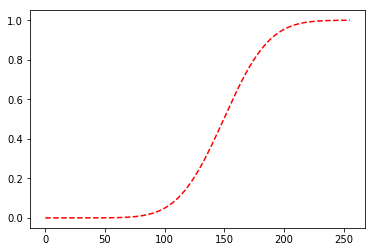

In [46]:
from scipy.stats import norm

filename = './images/satellite.jpg'
satellite = io.imread(filename)
satellite_grey=rgb2gray(satellite) 
satellite_ubyte=img_as_ubyte(satellite_grey)

max_img = satellite_ubyte.max()
min_img = satellite_ubyte.min()
x = np.arange(256)
pdf_to_fit = norm.pdf(x, 150, 30)
cdf = np.cumsum(pdf_to_fit)
plt.plot(x,cdf,'r--')

print(max_img)
print(min_img)


**Use the defined function to match the histogram of gray version of satellite image to `pdf_to_fit`**

C:\Users\home\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


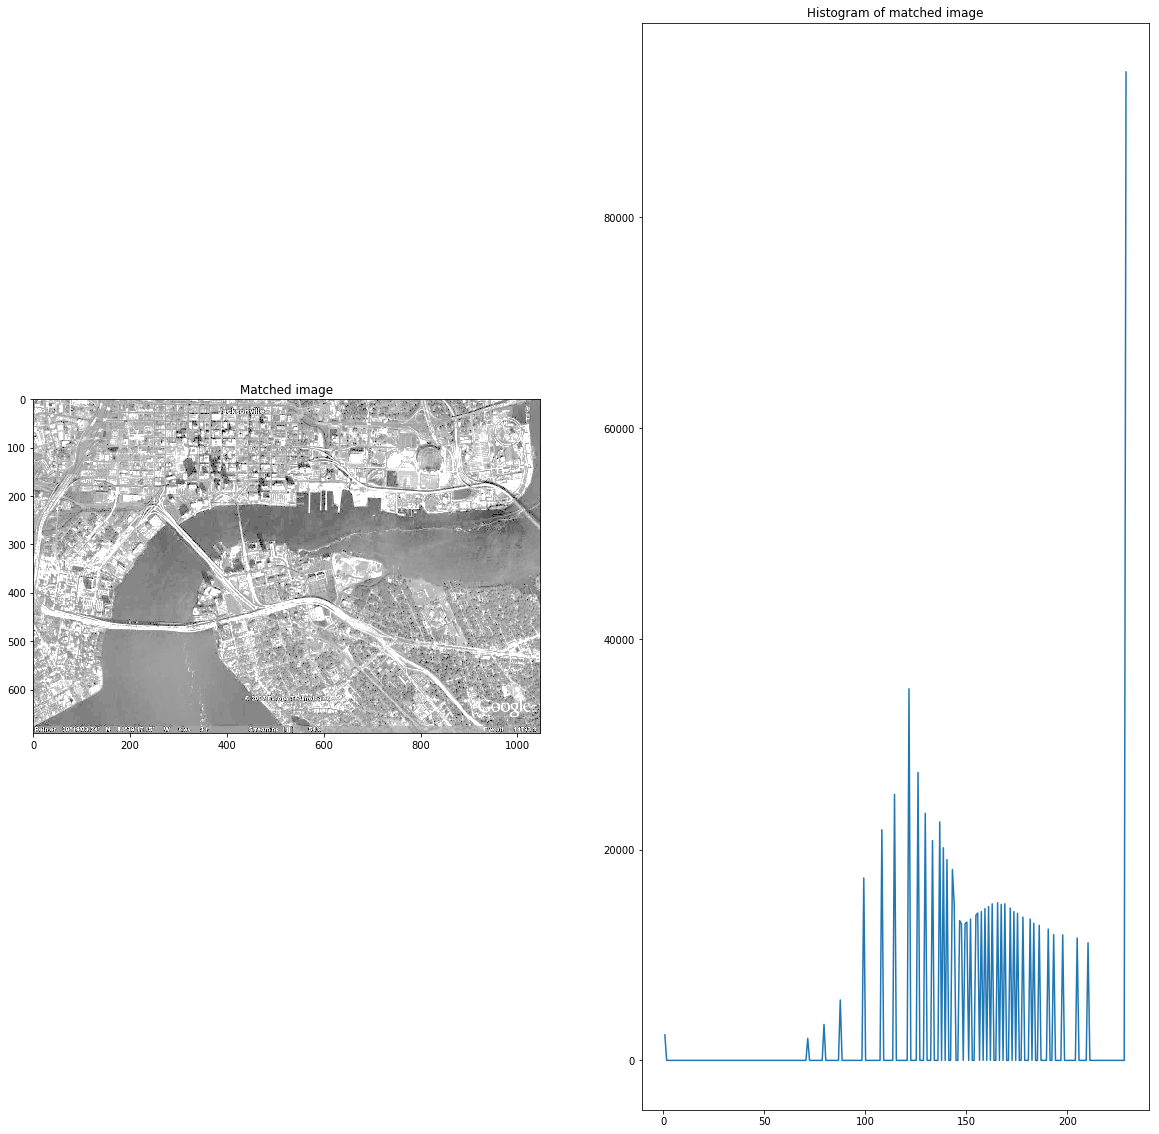

In [47]:
filename = './images/satellite.jpg'
satellite = io.imread(filename)
satellite_grey=rgb2gray(satellite) 
satellite_ubyte=img_as_ubyte(satellite_grey)

matched_img  = hist_match(satellite_ubyte, pdf_to_fit, min_img, max_img)

fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(20,20))
ax0, ax1 = axes.ravel()
ax0.imshow(matched_img, cmap=cm.gray)
ax0.set_title('Matched image')
bins, bins_c=np.histogram(matched_img, 256) 
ax1.plot(bins_c[1:],bins)
ax1.set_title('Histogram of matched image')

### Q.5 

** Explain the difference between log transform enhancement and gamma transform **


The log transformation s = c∙log(1+r) maps a narrow range of low intensity values in the input into a wider range of output levels. As a consequence, the dark pixels in an image are expanded as compare to the higher pixel values. Higher values in input are compressed. Thus, only very dark regions remain dark, other intensities get brighter.
The same effect gives gamma transformation s = c∙r^y (y - gamma). But we can have many possible transformations by simply varying y. If y < 1 then we will obtain the opposite effect. So we can say that gamma transformation is more versatile. 

** Explain how sigmoid function enhances the image **

Sigmoid function increases the contrast of an image. It has an "S"-shaped curve, so dark pixels of input image become even darker and bright pixels become brighter, so we see greater contrast.